In [298]:
import requests 
import json
import os
from dotenv import load_dotenv
import pandas as pd
from pandas import json_normalize
from bs4 import BeautifulSoup as bs
import time
import seaborn as sns
import matplotlib.pyplot as plt

import requests

url = "https://covid-193.p.rapidapi.com/statistics"

headers = {
    'x-rapidapi-host': "covid-193.p.rapidapi.com",
    'x-rapidapi-key': "c626d6c478msh5f1aa9758ec0e22p1e219ajsn0ed4c7e9c605"
    }

response = requests.request("GET", url, headers=headers).json()

print(response)

response['response'][0]['country']

datos=response['response']
countries = []
for i in datos:
    countries.append(i['country'])

countries

Countries


url = "https://covid-193.p.rapidapi.com/countries"

headers = {
    'x-rapidapi-host': "covid-193.p.rapidapi.com",
    'x-rapidapi-key': "c626d6c478msh5f1aa9758ec0e22p1e219ajsn0ed4c7e9c605"
    }

response = requests.request("GET", url, headers=headers).json()

response

In [112]:
import requests

url = "https://covid-193.p.rapidapi.com/history"

querystring = {"country":"usa"}

headers = {
    'x-rapidapi-host': "covid-193.p.rapidapi.com",
    'x-rapidapi-key': "c626d6c478msh5f1aa9758ec0e22p1e219ajsn0ed4c7e9c605"
    }

response = requests.request("GET", url, headers=headers, params=querystring).json()

response


{'get': 'history',
 'parameters': {'country': 'usa'},
 'errors': [],
 'results': 21556,
 'response': [{'continent': 'North-America',
   'country': 'USA',
   'population': 333622477,
   'cases': {'new': None,
    'active': 9228410,
    'critical': 11227,
    'recovered': 37332949,
    '1M_pop': '141887',
    'total': 47336577},
   'deaths': {'new': None, '1M_pop': '2324', 'total': 775218},
   'tests': {'1M_pop': '2126408', 'total': 709417394},
   'day': '2021-11-08',
   'time': '2021-11-08T11:00:03+00:00'},
  {'continent': 'North-America',
   'country': 'USA',
   'population': 333622477,
   'cases': {'new': '+23165',
    'active': 9228410,
    'critical': 11227,
    'recovered': 37332949,
    '1M_pop': '141887',
    'total': 47336577},
   'deaths': {'new': '+123', '1M_pop': '2324', 'total': 775218},
   'tests': {'1M_pop': '2126301', 'total': 709381751},
   'day': '2021-11-08',
   'time': '2021-11-08T02:45:02+00:00'},
  {'continent': 'North-America',
   'country': 'USA',
   'population':

import requests

url = "https://community-open-weather-map.p.rapidapi.com/climate/month"

querystring = {"q":"san francisco,us","lat":"35","lon":"139","cnt":"10","units":"metric or imperial"}

headers = {
    'x-rapidapi-host': "community-open-weather-map.p.rapidapi.com",
    'x-rapidapi-key': "c626d6c478msh5f1aa9758ec0e22p1e219ajsn0ed4c7e9c605"
    }

response = requests.request("GET", url, headers=headers, params=querystring).json()
response

# Are colder countries more susceptible to Covid-19?

We are going to list our countries by latitude and obtain their average temperature doing web scrapping. Then, we will plot by country and by latitude to see the results

## Function:Get cases in each country ordered by the average latitude of the country

In [102]:
covid_data = pd.DataFrame(pd.read_csv('../data/covid_19_clean_complete.csv')).groupby('Country/Region').mean()
covid_data.sort_values(by='Lat', axis=0, inplace = True,)
covid_data.head(10)

,Lat,Long,Confirmed,Deaths,Recovered,Active
Country/Region,,,,,,
New Zealand,-40.900600,174.886000,936.058511,11.601064,795.531915,128.925532
Argentina,-38.416100,-63.616700,23673.712766,519.941489,8936.297872,14217.473404
Chile,-35.675100,-71.543000,90083.265957,1715.319149,70705.281915,17662.664894
Uruguay,-32.522800,-55.765800,503.946809,13.063830,387.015957,103.867021
Australia,-32.106275,141.355488,638.462101,7.571144,473.356383,157.534574
South Africa,-30.559500,22.937500,59408.207447,967.973404,31044.803191,27395.430851
Lesotho,-29.610000,28.233600,36.138298,0.521277,7.010638,28.606383
Eswatini,-26.522500,31.465900,335.957447,4.058511,160.558511,171.340426
Paraguay,-23.442500,-58.443800,831.771277,8.845745,403.191489,419.734043


In [69]:
covid_data.reset_index(inplace=True)
covid_data.rename(columns ={'Country/Region':'country'},inplace=True)


## Function: get average temperature by country by using web scrapping

In [33]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature"
html = requests.get(url)
soup = bs(html.content,"html.parser")

In [42]:
tabla_temps=soup.findAll("table")[0]


In [54]:
tabla_temps.findAll('tr') [1].findAll('td')[0].getText().strip()

'Burkina Faso'

In [53]:
tabla_temps.findAll('tr')[1].findAll('td')[1].getText().strip()

'28.29'

In [274]:
def averagetemp(x):
    temperature=[]
    for f in x.findAll('tr')[1:]: #list with all rows in the table
        country = f.findAll('td')[0].getText().strip()
        temp = f.findAll('td')[1].getText().strip()

        diccionario = {"country": country, "temp": temp}

        temperature.append(diccionario)
    avTemp = pd.DataFrame(temperature)
    return avTemp

In [58]:
temperature=[]
for f in tabla_temps.findAll('tr')[1:]: #list with all rows in the table
    country = f.findAll('td')[0].getText().strip()
    temp = f.findAll('td')[1].getText().strip()
    
    diccionario = {"country": country, "temp": temp}
    
    temperature.append(diccionario)
avTemp = pd.DataFrame(temperature)

In [275]:
avTemp = averagetemp(tabla_temps)
avTemp.head()

,country,temp
0,Burkina Faso,28.29
1,Mali,28.25
2,Kiribati,28.20
3,Djibouti,28.00
4,Tuvalu,28.00


## Function: merge both dataframes

In [95]:
hyp1=pd.merge(covid_data, avTemp, on="country")
hyp1['temp'].replace(to_replace='−0.70',value=-0.7, inplace = True)
hyp1['temp'].replace(to_replace='−5.10',value=-5.1, inplace = True)
hyp1['temp'].replace(to_replace='−5.35',value=-5.35, inplace = True)
hyp1['temp'] = hyp1['temp'].astype(float)

In [ ]:
def merge(x,y):
    hyp1=pd.merge(x, y, on="country")
    hyp1['temp'].replace(to_replace='−0.70',value=-0.7, inplace = True)
    hyp1['temp'].replace(to_replace='−5.10',value=-5.1, inplace = True)
    hyp1['temp'].replace(to_replace='−5.35',value=-5.35, inplace = True)
    hyp1['temp'] = hyp1['temp'].astype(float)
    
    return hyp1

## Function: print results

In [97]:

sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,8.)})
sns.set_style("whitegrid")

In [92]:
type(hyp1['temp'][4])

str

<AxesSubplot:xlabel='Lat', ylabel='temp'>

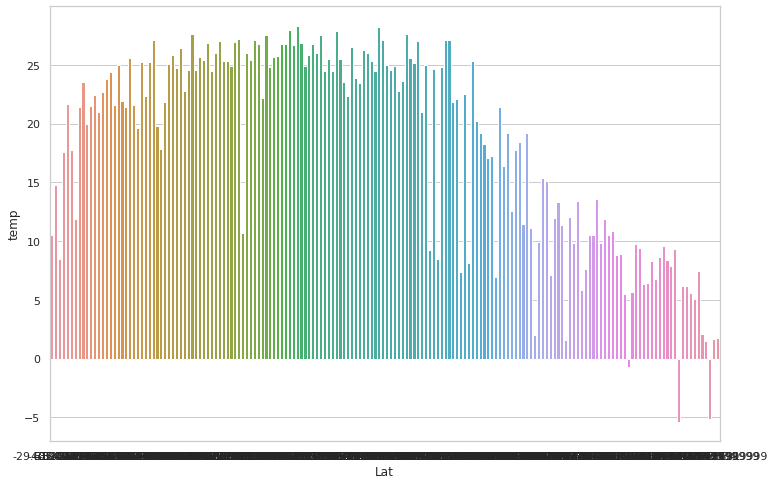

In [100]:
sns.barplot(x='Lat', y = 'temp', data=hyp1)

## Function: generate new column for Zone 

In [106]:
Zones = []
for l in range(0,len(hyp1['Lat'])):
    if hyp1['Lat'][l] < -66.5:
        Zones.append('Antarctic')
    elif hyp1['Lat'][l] < -23.55:
        Zones.append('South Temperate')
    elif hyp1['Lat'][l] < 0:
        Zones.append('South Tropic')
    elif hyp1['Lat'][l] < 23.55:
        Zones.append('North Tropic')
    elif hyp1['Lat'][l] < 66.5:
        Zones.append('North Temperate')
    else:
        Zones.append('Artic')

hyp1['Zones'] = Zones

In [ ]:
def newzones(x):
    Zones = []
    for l in range(0,len(hyp1['Lat'])):
        if hyp1['Lat'][l] < -66.5:
            Zones.append('Antarctic')
        elif hyp1['Lat'][l] < -23.55:
            Zones.append('South Temperate')
        elif hyp1['Lat'][l] < 0:
            Zones.append('South Tropic')
        elif hyp1['Lat'][l] < 23.55:
            Zones.append('North Tropic')
        elif hyp1['Lat'][l] < 66.5:
            Zones.append('North Temperate')
        else:
            Zones.append('Artic')
    return Zones

In [ ]:
hyp1['Zones'] = newzones(hyp1['Lat'])

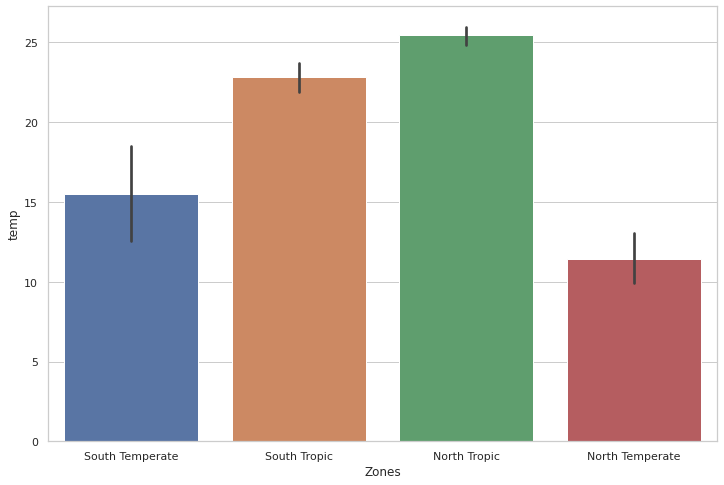

In [115]:
sns.barplot(x='Zones', y = 'temp', data=hyp1);

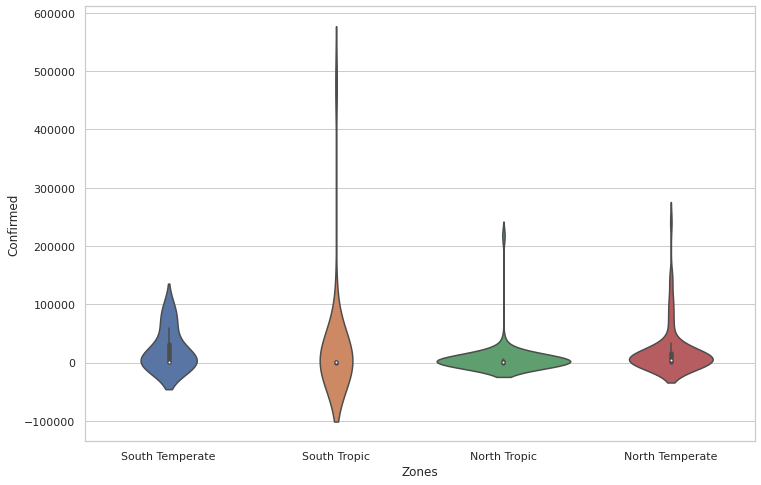

In [114]:
sns.violinplot(x='Zones', y = 'Confirmed', data=hyp1);

### The 'Confirmed' column does not provide accurate data, because there is a direct relation between tests done and  confirmed cases. Thus, we need the percentage of people tested that have had a positive result. 

### For this, we are going to call an API

In [206]:
import requests

url = "https://covid-193.p.rapidapi.com/history"

querystring = {"country":'Spain',"day":"2020-11-08"} #Database values are from a year ago

headers = {
    'x-rapidapi-host': "covid-193.p.rapidapi.com",
    'x-rapidapi-key': "c626d6c478msh5f1aa9758ec0e22p1e219ajsn0ed4c7e9c605"
    }

response = requests.request("GET", url, headers=headers, params=querystring).json()


In [203]:
response['response'][0]['tests']['total']

18072174

In [133]:
response['response'][0]['population']

46761136

In [238]:
# population=[]
# tests=[]
# for i in hyp1['country']:
#     url = "https://covid-193.p.rapidapi.com/history"

#     querystring = {f"country":{i},"day":"2020-11-08"} #Database values are from a year ago

#     headers = {
#         'x-rapidapi-host': "covid-193.p.rapidapi.com",
#         'x-rapidapi-key': "c626d6c478msh5f1aa9758ec0e22p1e219ajsn0ed4c7e9c605"
#         }

#     response = requests.request("GET", url, headers=headers, params=querystring).json()
#     if len(response)>0:
#         if len(response['response'])>0:
#             population.append(response['response'][0]['population'])
#             tests.append(response['response'][0]['tests']['total'])
#         else:
#             population.append('unknown')
#             tests.append('unknown')
#     else:
#         population.append('unknown')
#         tests.append('unknown')
#     time.sleep(0.5)
#     print(i)

In [146]:
hyp1['country'][55]

'Benin'

In [236]:
def poptest(x):
    time.sleep(1.1)
    url = "https://covid-193.p.rapidapi.com/history"

    querystring = {f"country":{x},"day":"2020-11-08"} #Database values are from a year ago

    headers = {
        'x-rapidapi-host': "covid-193.p.rapidapi.com",
        'x-rapidapi-key': "c626d6c478msh5f1aa9758ec0e22p1e219ajsn0ed4c7e9c605"
        }

    response = requests.request("GET", url, headers=headers, params=querystring).json()
    
    try:
        return (response['response'][0]['population'],response['response'][0]['tests']['total'])
        
    except:
        return ('NaN', 'NaN')
    

In [237]:
poputests = hyp1['country'].apply(poptest)

In [239]:
lista=list(poputests)

In [240]:
lista=pd.DataFrame(lista, columns=['Population','Tests'])

In [241]:
hyp1['Population']=lista['Population']
hyp1['Tests']=lista['Tests']

In [264]:
hyp1['Population'] = hyp1['Population'].astype(float)
hyp1['Tests'] = hyp1['Tests'].astype(float)
hyp1['Confirmed'] = hyp1['Confirmed'].astype(float)
hyp1['Deaths'] = hyp1['Deaths'].astype(float)
hyp1['Recovered'] = hyp1['Recovered'].astype(float)
hyp1['Active'] = hyp1['Active'].astype(float)

In [265]:
hyp1['PositiveRate']=hyp1['Confirmed']/hyp1['Tests']

In [290]:
hyp1['Mortality']=hyp1['Deaths']/hyp1['Confirmed']

In [291]:
hyp1zones=hyp1.groupby('Zones').mean()

In [293]:
hyp1zones.reset_index(inplace=True)

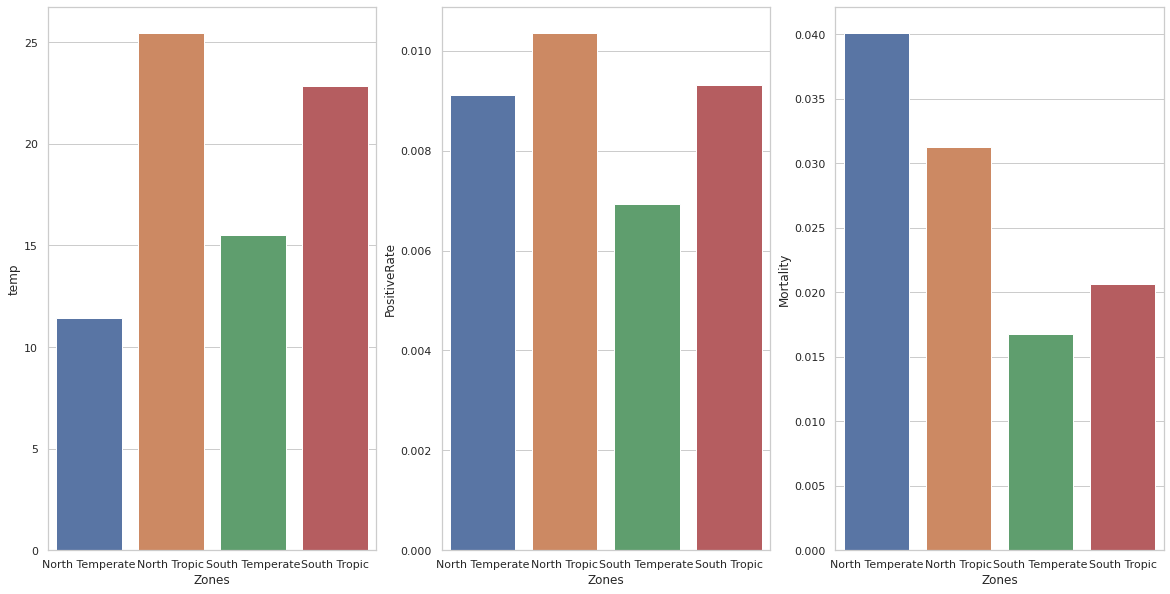

In [306]:

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.barplot(x='Zones', y = 'PositiveRate', data=hyp1zones, ax=axs[1]);
sns.barplot(x='Zones', y = 'temp', data=hyp1zones, ax=axs[0]);
sns.barplot(x='Zones', y = 'Mortality', data=hyp1zones, ax=axs[2]);